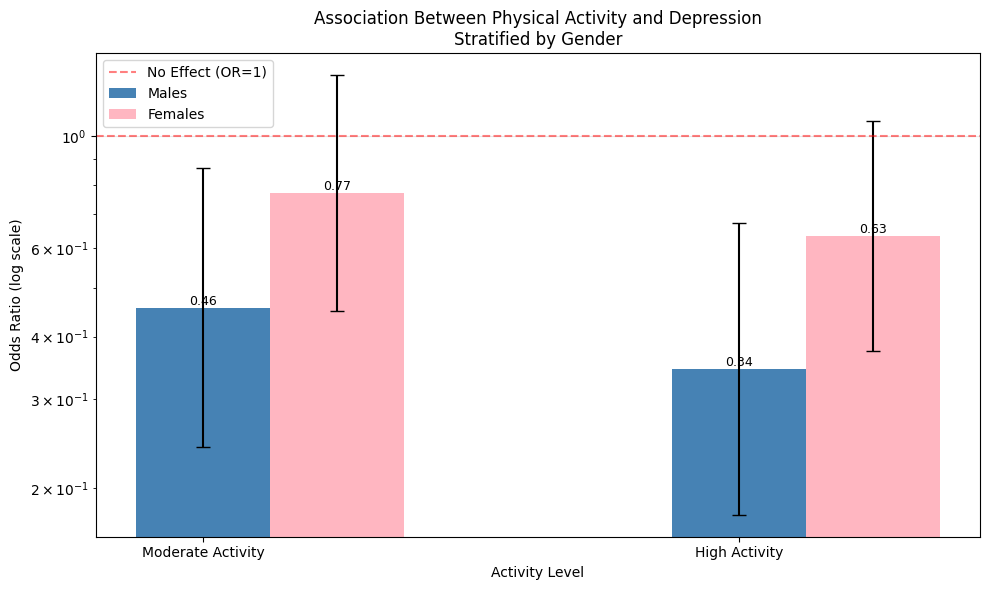

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Data for activity levels by gender
data = {
    'Males': {
        'Moderate Activity': {'OR': 0.457, 'CI_lower': 0.241, 'CI_upper': 0.867},
        'High Activity': {'OR': 0.345, 'CI_lower': 0.177, 'CI_upper': 0.673}
    },
    'Females': {
        'Moderate Activity': {'OR': 0.772, 'CI_lower': 0.449, 'CI_upper': 1.324},
        'High Activity': {'OR': 0.633, 'CI_lower': 0.374, 'CI_upper': 1.072}
    }
}

# Plot setup
plt.figure(figsize=(10, 6))
categories = ['Moderate Activity', 'High Activity']
x = np.arange(len(categories))
width = 0.25

groups = [
    ("Males", "steelblue", 0),
    ("Females", "lightpink", width)
]

# Plot bars in a loop
for label, color, offset in groups:
    ors = [data[label][cat]['OR'] for cat in categories]
    errors = [
        [data[label][cat]['OR'] - data[label][cat]['CI_lower'] for cat in categories],
        [data[label][cat]['CI_upper'] - data[label][cat]['OR'] for cat in categories]
    ]
    rects = plt.bar(x + offset, ors, width, label=label, yerr=errors,
                    capsize=5, color=color)
    
    # Add value labels
    for rect in rects:
        h = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., h,
                 f'{h:.2f}', ha='center', va='bottom', fontsize=9)

# Reference line
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='No Effect (OR=1)')

# Customize plot
plt.xlabel('Activity Level')
plt.ylabel('Odds Ratio (log scale)')
plt.title('Association Between Physical Activity and Depression\nStratified by Gender')
plt.xticks(x, categories)
plt.yscale('log')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


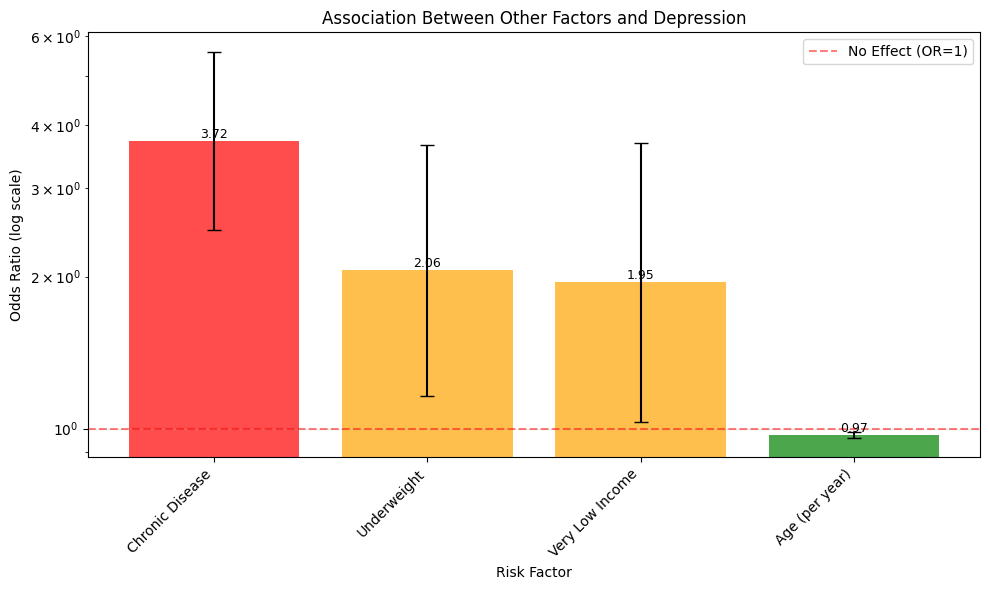

In [2]:
# Other risk factors data
risk_factors = {
    'Chronic Disease': {'OR': 3.72, 'CI_lower': np.exp(0.905), 'CI_upper': np.exp(1.720)},
    'Underweight': {'OR': 2.06, 'CI_lower': np.exp(0.149), 'CI_upper': np.exp(1.296)},
    'Very Low Income': {'OR': 1.95, 'CI_lower': np.exp(0.029), 'CI_upper': np.exp(1.302)},
    'Age (per year)': {'OR': 0.97, 'CI_lower': np.exp(-0.044), 'CI_upper': np.exp(-0.018)}
}

# Create the plot
plt.figure(figsize=(10, 6))
risk_categories = list(risk_factors.keys())
risk_ors = [risk_factors[cat]['OR'] for cat in risk_categories]
risk_errors_lower = [risk_factors[cat]['OR'] - risk_factors[cat]['CI_lower'] for cat in risk_categories]
risk_errors_upper = [risk_factors[cat]['CI_upper'] - risk_factors[cat]['OR'] for cat in risk_categories]
risk_errors = [risk_errors_lower, risk_errors_upper]

x_risk = np.arange(len(risk_categories))
rects_risk = plt.bar(x_risk, risk_ors, yerr=risk_errors, capsize=5, alpha=0.7, 
                     color=['red', 'orange', 'orange', 'green'])

# Add reference line at OR=1
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5, label='No Effect (OR=1)')

# Customize plot
plt.xlabel('Risk Factor')
plt.ylabel('Odds Ratio (log scale)')
plt.title('Association Between Other Factors and Depression')
plt.xticks(x_risk, risk_categories, rotation=45, ha='right')
plt.yscale('log')
plt.legend()
plt.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for rect in rects_risk:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

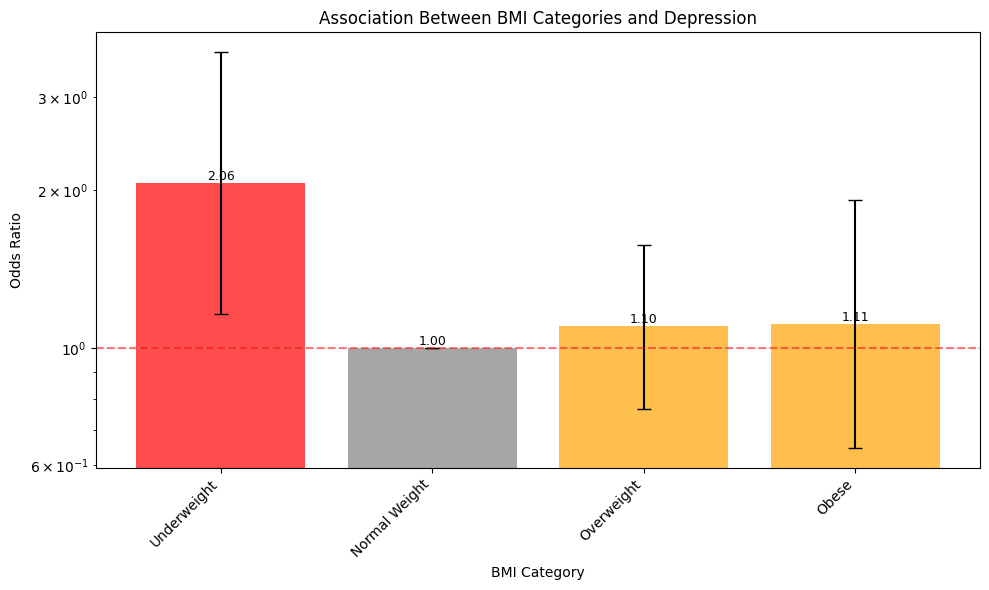

In [3]:
# BMI categories data
bmi_data = {
    'Underweight': {'OR': 2.06, 'CI_lower': np.exp(0.149), 'CI_upper': np.exp(1.296)},
    'Normal Weight': {'OR': 1.00, 'CI_lower': 1.00, 'CI_upper': 1.00},
    'Overweight': {'OR': 1.10, 'CI_lower': np.exp(-0.266), 'CI_upper': np.exp(0.453)},
    'Obese': {'OR': 1.11, 'CI_lower': np.exp(-0.437), 'CI_upper': np.exp(0.648)}
}

# Create the plot
plt.figure(figsize=(10, 6))
bmi_categories = list(bmi_data.keys())
bmi_ors = [bmi_data[cat]['OR'] for cat in bmi_categories]
bmi_errors_lower = [bmi_data[cat]['OR'] - bmi_data[cat]['CI_lower'] for cat in bmi_categories]
bmi_errors_upper = [bmi_data[cat]['CI_upper'] - bmi_data[cat]['OR'] for cat in bmi_categories]
bmi_errors = [bmi_errors_lower, bmi_errors_upper]

x_bmi = np.arange(len(bmi_categories))
colors_bmi = ['red' if or_val > 1.5 else 'orange' if or_val > 1 else 'gray' for or_val in bmi_ors]
rects_bmi = plt.bar(x_bmi, bmi_ors, yerr=bmi_errors, capsize=5, color=colors_bmi, alpha=0.7)

plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)
plt.xlabel('BMI Category')
plt.ylabel('Odds Ratio')
plt.title('Association Between BMI Categories and Depression')
plt.xticks(x_bmi, bmi_categories, rotation=45, ha='right')
plt.yscale('log')
plt.grid(True, axis='y', alpha=0.3)

for rect in rects_bmi:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

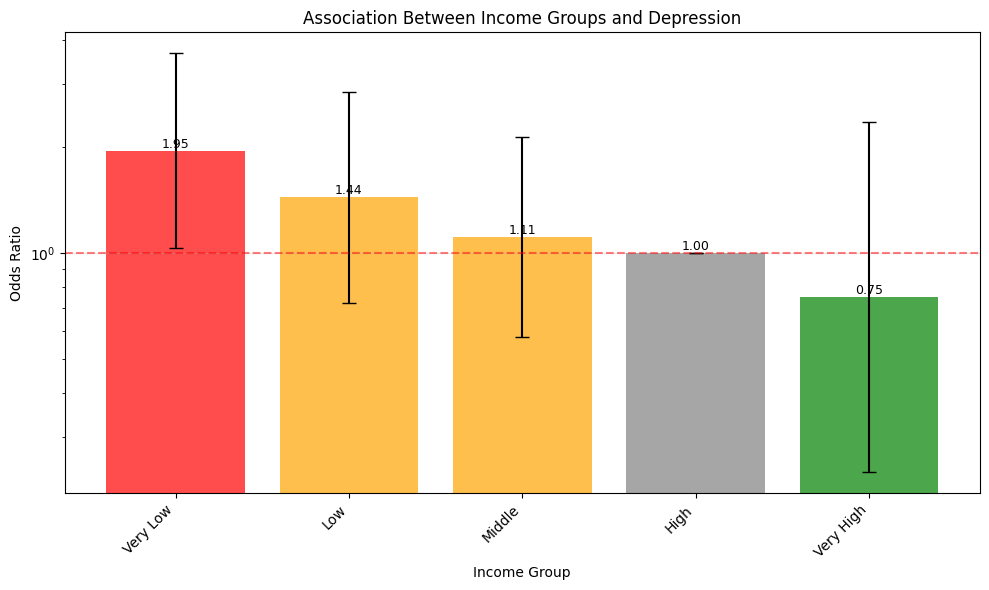

In [4]:
# Income groups data
income_data = {
    'Very Low': {'OR': 1.95, 'CI_lower': np.exp(0.029), 'CI_upper': np.exp(1.302)},
    'Low': {'OR': 1.44, 'CI_lower': np.exp(-0.324), 'CI_upper': np.exp(1.049)},
    'Middle': {'OR': 1.11, 'CI_lower': np.exp(-0.547), 'CI_upper': np.exp(0.757)},
    'High': {'OR': 1.00, 'CI_lower': 1.00, 'CI_upper': 1.00},
    'Very High': {'OR': 0.75, 'CI_lower': np.exp(-1.432), 'CI_upper': np.exp(0.857)}
}

# Create the plot
plt.figure(figsize=(10, 6))
income_categories = list(income_data.keys())
income_ors = [income_data[cat]['OR'] for cat in income_categories]
income_errors_lower = [income_data[cat]['OR'] - income_data[cat]['CI_lower'] for cat in income_categories]
income_errors_upper = [income_data[cat]['CI_upper'] - income_data[cat]['OR'] for cat in income_categories]
income_errors = [income_errors_lower, income_errors_upper]

x_income = np.arange(len(income_categories))
colors_income = ['red' if or_val > 1.5 else 'orange' if or_val > 1 else 'green' if or_val < 1 else 'gray' for or_val in income_ors]
rects_income = plt.bar(x_income, income_ors, yerr=income_errors, capsize=5, color=colors_income, alpha=0.7)

plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Income Group')
plt.ylabel('Odds Ratio')
plt.title('Association Between Income Groups and Depression')
plt.xticks(x_income, income_categories, rotation=45, ha='right')
plt.yscale('log')
plt.grid(True, axis='y', alpha=0.3)

for rect in rects_income:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

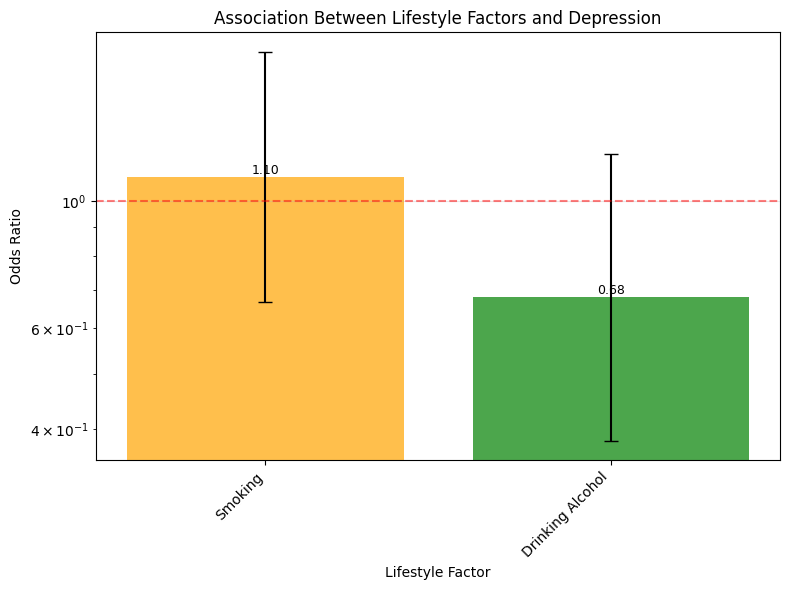

In [5]:
# Lifestyle factors data
lifestyle_data = {
    'Smoking': {'OR': 1.10, 'CI_lower': np.exp(-0.408), 'CI_upper': np.exp(0.597)},
    'Drinking Alcohol': {'OR': 0.68, 'CI_lower': np.exp(-0.963), 'CI_upper': np.exp(0.187)}
}

# Create the plot
plt.figure(figsize=(8, 6))
lifestyle_categories = list(lifestyle_data.keys())
lifestyle_ors = [lifestyle_data[cat]['OR'] for cat in lifestyle_categories]
lifestyle_errors_lower = [lifestyle_data[cat]['OR'] - lifestyle_data[cat]['CI_lower'] for cat in lifestyle_categories]
lifestyle_errors_upper = [lifestyle_data[cat]['CI_upper'] - lifestyle_data[cat]['OR'] for cat in lifestyle_categories]
lifestyle_errors = [lifestyle_errors_lower, lifestyle_errors_upper]

x_lifestyle = np.arange(len(lifestyle_categories))
colors_lifestyle = ['orange' if or_val > 1 else 'green' for or_val in lifestyle_ors]
rects_lifestyle = plt.bar(x_lifestyle, lifestyle_ors, yerr=lifestyle_errors, capsize=5, color=colors_lifestyle, alpha=0.7)

plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Lifestyle Factor')
plt.ylabel('Odds Ratio')
plt.title('Association Between Lifestyle Factors and Depression')
plt.xticks(x_lifestyle, lifestyle_categories, rotation=45, ha='right')
plt.yscale('log')
plt.grid(True, axis='y', alpha=0.3)

for rect in rects_lifestyle:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

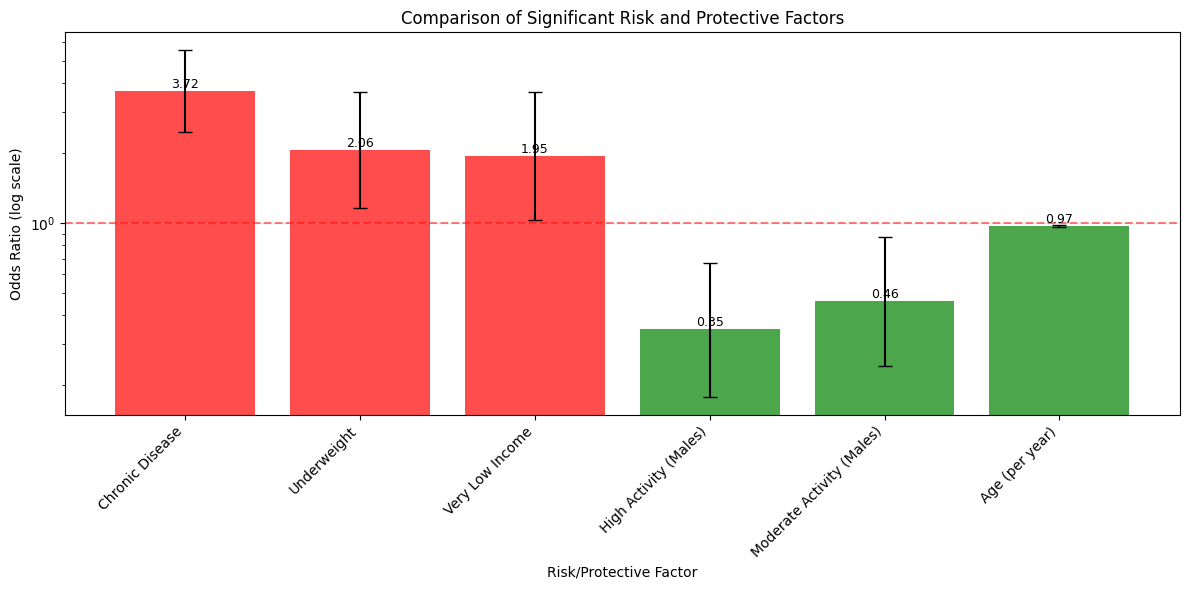

In [6]:
# All significant factors data
significant_factors = {
    'Chronic Disease': {'OR': 3.72, 'CI_lower': np.exp(0.905), 'CI_upper': np.exp(1.720)},
    'Underweight': {'OR': 2.06, 'CI_lower': np.exp(0.149), 'CI_upper': np.exp(1.296)},
    'Very Low Income': {'OR': 1.95, 'CI_lower': np.exp(0.029), 'CI_upper': np.exp(1.302)},
    'High Activity (Males)': {'OR': 0.35, 'CI_lower': 0.177, 'CI_upper': 0.673},
    'Moderate Activity (Males)': {'OR': 0.46, 'CI_lower': 0.241, 'CI_upper': 0.867},
    'Age (per year)': {'OR': 0.97, 'CI_lower': np.exp(-0.044), 'CI_upper': np.exp(-0.018)}
}

# Create the plot
plt.figure(figsize=(12, 6))
sig_categories = list(significant_factors.keys())
sig_ors = [significant_factors[cat]['OR'] for cat in sig_categories]
sig_errors_lower = [significant_factors[cat]['OR'] - significant_factors[cat]['CI_lower'] for cat in sig_categories]
sig_errors_upper = [significant_factors[cat]['CI_upper'] - significant_factors[cat]['OR'] for cat in sig_categories]
sig_errors = [sig_errors_lower, sig_errors_upper]

x_sig = np.arange(len(sig_categories))
colors_sig = ['red' if or_val > 1.5 else 'orange' if or_val > 1 else 'green' for or_val in sig_ors]
rects_sig = plt.bar(x_sig, sig_ors, yerr=sig_errors, capsize=5, color=colors_sig, alpha=0.7)

plt.axhline(y=1, color='r', linestyle='--', alpha=0.5)
plt.xlabel('Risk/Protective Factor')
plt.ylabel('Odds Ratio (log scale)')
plt.title('Comparison of Significant Risk and Protective Factors')
plt.xticks(x_sig, sig_categories, rotation=45, ha='right')
plt.yscale('log')
plt.grid(True, axis='y', alpha=0.3)

for rect in rects_sig:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., height,
             f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

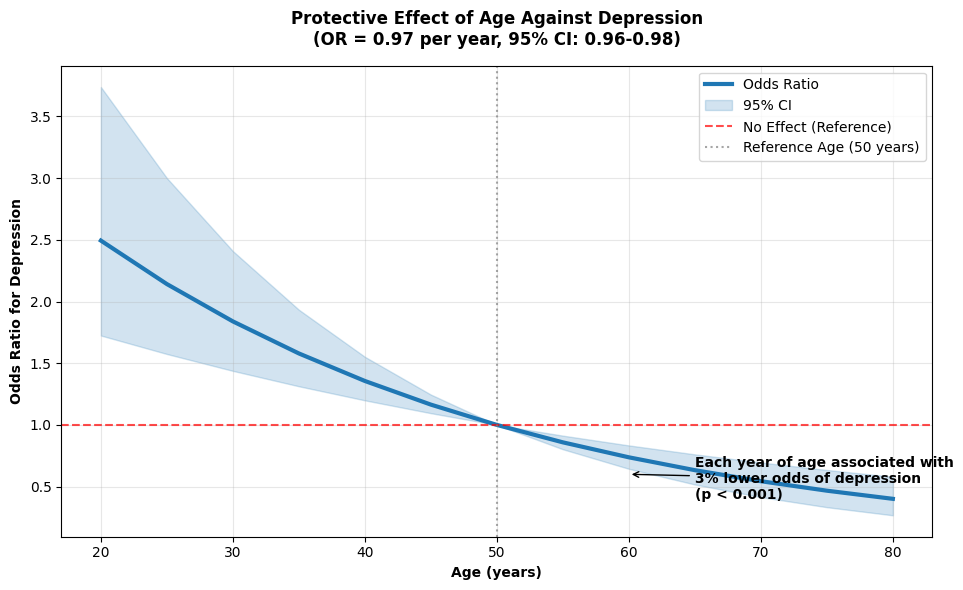

Odds Ratios for Depression by Age (Reference = 50 years):
Age 20: OR = 2.494 (95% CI: 3.738-1.724)
Age 30: OR = 1.839 (95% CI: 2.409-1.438)
Age 40: OR = 1.356 (95% CI: 1.552-1.199)
Age 50: OR = 1.000 (95% CI: 1.000-1.000)
Age 60: OR = 0.737 (95% CI: 0.644-0.834)
Age 70: OR = 0.544 (95% CI: 0.415-0.695)
Age 80: OR = 0.401 (95% CI: 0.268-0.580)


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create the corrected age effect plot
plt.figure(figsize=(10, 6))

# From your results: OR = 0.97 per year, p < 0.001
# This means each year of age is associated with 3% lower odds of depression

# We'll plot the ODDS RATIO by age, not the probability
# Using a reference age of 50 years (common in medical literature)
reference_age = 50
ages = np.arange(20, 81, 5)  # Ages from 20 to 80 in 5-year increments

# Calculate odds ratio relative to reference age
# OR = 0.97^(age_difference)
age_differences = ages - reference_age
odds_ratios = 0.97 ** age_differences

# Calculate 95% confidence intervals (from your results: CI for age coefficient)
# Your age coefficient: -0.0311 with SE = 0.007
# 95% CI for coefficient: -0.044 to -0.018
# Convert to OR scale: exp(-0.044) to exp(-0.018) = 0.957 to 0.982 per year
ci_lower = 0.957 ** age_differences
ci_upper = 0.982 ** age_differences

# Use tableau color (blue)
tableau_blue = '#1f77b4'

# Create the plot
plt.plot(ages, odds_ratios, linewidth=3, color=tableau_blue, label='Odds Ratio')
plt.fill_between(ages, ci_lower, ci_upper, color=tableau_blue, alpha=0.2, label='95% CI')

plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, label='No Effect (Reference)')
plt.axvline(x=reference_age, color='gray', linestyle=':', alpha=0.7, label=f'Reference Age ({reference_age} years)')

plt.xlabel('Age (years)', fontweight='bold')
plt.ylabel('Odds Ratio for Depression', fontweight='bold')
plt.title('Protective Effect of Age Against Depression\n(OR = 0.97 per year, 95% CI: 0.96-0.98)', 
          fontweight='bold', fontsize=12, pad=15)
plt.grid(True, alpha=0.3)
plt.legend()

# Add text annotation with key finding
plt.annotate('Each year of age associated with\n3% lower odds of depression\n(p < 0.001)', 
             xy=(60, 0.6), xytext=(65, 0.4),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontweight='bold')

plt.tight_layout()
plt.show()

# Print some key values
print("Odds Ratios for Depression by Age (Reference = 50 years):")
for i, age in enumerate(ages):
    if age % 10 == 0:  # Print every 10 years for clarity
        print(f"Age {age}: OR = {odds_ratios[i]:.3f} (95% CI: {ci_lower[i]:.3f}-{ci_upper[i]:.3f})")

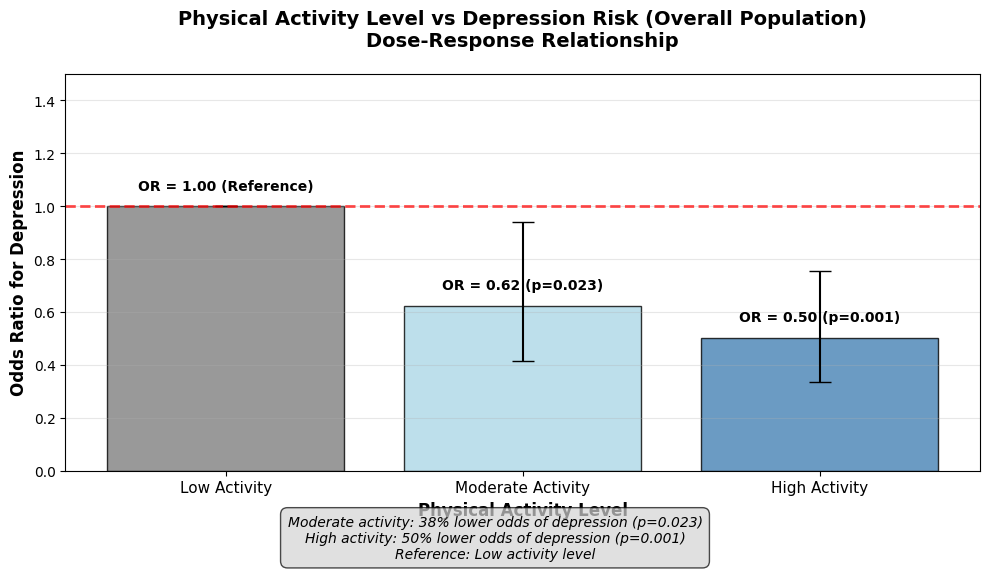

ACTIVITY LEVEL VS DEPRESSION - OVERALL ANALYSIS
Activity Level       Odds Ratio   95% CI               Reduction       P-value   
------------------------------------------------------------
Low Activity         1.000        [1.000-1.000]  Reference       Reference 
Moderate Activity    0.624        [0.415-0.938]  37.6%           0.023     
High Activity        0.503        [0.336-0.754]  49.7%           0.001     


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Data from overall analysis
activity_data = {
    'Low Activity': {'OR': 1.00, 'CI_lower': 1.00, 'CI_upper': 1.00},  # Reference
    'Moderate Activity': {'OR': 0.624, 'CI_lower': 0.415, 'CI_upper': 0.938},
    'High Activity': {'OR': 0.503, 'CI_lower': 0.336, 'CI_upper': 0.754}
}

# Create the plot
plt.figure(figsize=(10, 6))

# Extract data for plotting
categories = list(activity_data.keys())
ors = [activity_data[cat]['OR'] for cat in categories]
ci_lower = [activity_data[cat]['CI_lower'] for cat in categories]
ci_upper = [activity_data[cat]['CI_upper'] for cat in categories]

# Calculate error bars
errors_lower = [ors[i] - ci_lower[i] for i in range(len(ors))]
errors_upper = [ci_upper[i] - ors[i] for i in range(len(ors))]
errors = [errors_lower, errors_upper]

# Create bars with different colors
colors = ['gray', 'lightblue', 'steelblue']  # Reference, Moderate, High
x_pos = np.arange(len(categories))

bars = plt.bar(x_pos, ors, yerr=errors, capsize=8, alpha=0.8, color=colors, edgecolor='black')

# Add reference line at OR=1
plt.axhline(y=1, color='red', linestyle='--', alpha=0.7, linewidth=2, label='No Effect (Reference)')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    p_value = " (Reference)" if i == 0 else f" (p={0.023 if i == 1 else 0.001})"
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'OR = {height:.2f}{p_value}', ha='center', va='bottom', fontweight='bold')

# Customize the plot
plt.xlabel('Physical Activity Level', fontweight='bold', fontsize=12)
plt.ylabel('Odds Ratio for Depression', fontweight='bold', fontsize=12)
plt.title('Physical Activity Level vs Depression Risk (Overall Population)\nDose-Response Relationship', 
          fontweight='bold', fontsize=14, pad=20)
plt.xticks(x_pos, categories, fontsize=11)
plt.ylim(0, 1.5)  # Set y-axis limit to better show the protective effect

# Add grid
plt.grid(True, axis='y', alpha=0.3)

# Add interpretation text
plt.figtext(0.5, 0.01, 
            'Moderate activity: 38% lower odds of depression (p=0.023)\n'
            'High activity: 50% lower odds of depression (p=0.001)\n'
            'Reference: Low activity level',
            ha='center', fontsize=10, style='italic', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.7))

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Make room for the footer text
plt.show()

# Print the statistical summary
print("="*60)
print("ACTIVITY LEVEL VS DEPRESSION - OVERALL ANALYSIS")
print("="*60)
print(f"{'Activity Level':<20} {'Odds Ratio':<12} {'95% CI':<20} {'Reduction':<15} {'P-value':<10}")
print("-"*60)
for i, category in enumerate(categories):
    or_val = ors[i]
    reduction = f"{(1 - or_val) * 100:.1f}%" if i > 0 else "Reference"
    p_value = "Reference" if i == 0 else "0.023" if i == 1 else "0.001"
    print(f"{category:<20} {or_val:<12.3f} [{ci_lower[i]:.3f}-{ci_upper[i]:.3f}]  {reduction:<15} {p_value:<10}")
print("="*60)